In [54]:
import pandas as pd

In [55]:
wego = pd.read_csv('./data/headway.csv')

In [56]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In [72]:
for index, row in wego.iterrows():
    if row['ADJUSTED_LATE_COUNT'] > 0:
        wego.loc[index, 'ADH_CAT'] = 'late'
    elif row['ADJUSTED_EARLY_COUNT'] > 0:
        if row['TRIP_EDGE'] == 2:
            wego.loc[index, 'ADH_CAT'] = "on time"
        else:
            wego.loc[index, 'ADH_CAT'] = 'early'
    elif row['ADJUSTED_ONTIME_COUNT'] > 0:
        wego.loc[index, 'ADH_CAT'] = 'on time'

In [73]:
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ADH_CAT
0,120230801,1,99457890,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,6.500000,NaN,on time
1,120230801,1,99457891,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,on time
2,120230801,1,99457892,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,on time
3,120230801,1,99457893,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,NaN,0,0.000000,NaN,on time
4,120230801,1,99457894,8/1/2023,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,0,0,1,0,0.0,0,12.866666,5.0,on time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,9/30/2023,7,702,2312,353448,0,TO DOWNTOWN,...,5.266666,0,1,0,0,0.0,0,0.000000,NaN,late
350325,120230930,2,100406611,9/30/2023,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,0,1,0,0,NaN,0,0.000000,NaN,late
350326,120230930,2,100406612,9/30/2023,7,702,2312,353449,0,FROM DOWNTOWN,...,1.866666,0,0,1,0,0.0,0,0.000000,NaN,on time
350327,120230930,2,100406613,9/30/2023,7,702,2312,353449,0,FROM DOWNTOWN,...,17.500000,0,1,0,0,0.0,0,0.000000,NaN,late


In [74]:
wego.ADH_CAT.value_counts()

ADH_CAT
on time    282258
late        59038
early        9033
Name: count, dtype: int64

In [70]:
len(wego)

350329

In [71]:
import matplotlib.pyplot as plt

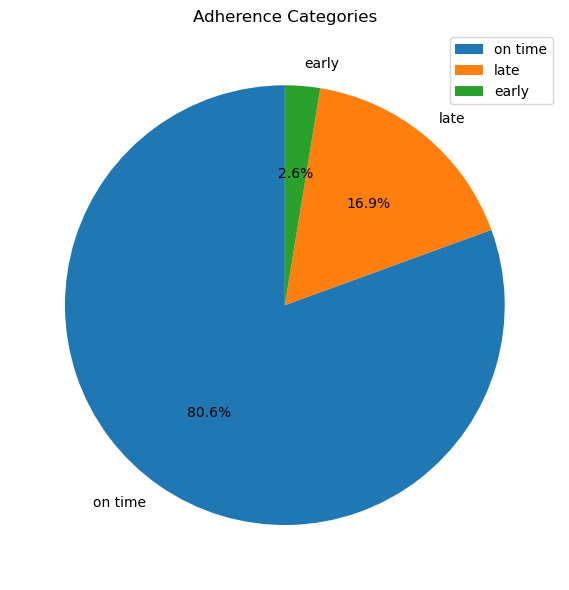

In [77]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'ADH_CAT': ['on time', 'late', 'early'],
    'count': [282258, 59038, 9033]
}


df = pd.DataFrame(data)


df.set_index('ADH_CAT', inplace=True)


df['count'].plot.pie(
    autopct='%1.1f%%',  
    figsize=(6, 6),
    startangle=90,
    legend=True,
    title='Adherence Categories'
)


plt.ylabel('')  
plt.tight_layout()
plt.show()


In [82]:
driver_performance = wego.groupby('OPERATOR')['ADH_CAT'].value_counts()
driver_performance.sort_values(ascending = False)

OPERATOR  ADH_CAT
1266      on time    2568
2352      on time    2545
1133      on time    2505
1147      on time    2463
1927      on time    2390
                     ... 
0         on time       1
3127      early         1
375       late          1
473       late          1
235       early         1
Name: count, Length: 968, dtype: int64

In [83]:
df = driver_performance.to_frame().reset_index()
df

,OPERATOR,ADH_CAT,count
0,0,on time,1
1,56,on time,3
2,235,on time,6
3,235,late,5
4,235,early,1
...,...,...,...
963,3165,on time,12
964,3166,on time,32
965,3166,late,3
966,3173,on time,20


In [115]:
ontime_operators = df[df['ADH_CAT'] == 'on time'].sort_values(by = 'count', ascending = False)
ontime_operators

,OPERATOR,ADH_CAT,count
140,1266,on time,2568
532,2352,on time,2545
99,1133,on time,2505
102,1147,on time,2463
376,1927,on time,2390
...,...,...,...
2,235,on time,6
502,2256,on time,6
1,56,on time,3
0,0,on time,1


In [85]:
late_operators = df[df['ADH_CAT'] == 'late'].sort_values(by = 'count', ascending = False)
late_operators

,OPERATOR,ADH_CAT,count
442,2109,late,936
320,1800,late,810
123,1204,late,767
873,3064,late,750
156,1352,late,728
...,...,...,...
47,473,late,1
557,2377,late,1
604,2493,late,1
599,2472,late,1


In [86]:
early_operators = df[df['ADH_CAT'] == 'early'].sort_values(by = 'count', ascending = False)
early_operators

,OPERATOR,ADH_CAT,count
75,659,early,354
445,2112,early,234
534,2352,early,184
296,1761,early,178
281,1717,early,177
...,...,...,...
356,1880,early,1
262,1673,early,1
273,1706,early,1
9,301,early,1


In [87]:
direction = wego.groupby(['ROUTE_DIRECTION_NAME', 'ADH_CAT']).count()
direction

CALENDAR_ID  SERVICE_ABBR  ADHERENCE_ID    DATE  \
ROUTE_DIRECTION_NAME ADH_CAT                                                    
FROM DOWNTOWN        early           4638          4638          4638    4638   
                     late           39601         39601         39601   39601   
                     on time       141554        141554        141554  141554   
TO DOWNTOWN          early           4395          4395          4395    4395   
                     late           19437         19437         19437   19437   
                     on time       140704        140704        140704  140704   

                              ROUTE_ABBR  BLOCK_ABBR  OPERATOR  TRIP_ID  \
ROUTE_DIRECTION_NAME ADH_CAT                                              
FROM DOWNTOWN        early          4638        4638      4638     4638   
                     late          39601       39601     39601    39601   
                     on time      141554      141554    141554   141554   
TO DOWNTOWN          early          4395        4395      4395     4395   
                     late          19437       19437     19437    19437   
                     on time      140704      140704    140704   140704   

                              OVERLOAD_ID  TIME_POINT_ABBR  ...  ACTUAL_HDWY  \
ROUTE_DIRECTION_NAME ADH_CAT                                ...                
FROM DOWNTOWN        early           4638             4638  ...         4511   
                     late           39601            39601  ...        30932   
                     on time       141554           141554  ...       106060   
TO DOWNTOWN          early           4395             4395  ...         4252   
                     late           19437            19437  ...        14946   
                     on time       140704           140704  ...       105361   

                              HDWY_DEV  ADJUSTED_EARLY_COUNT  \
ROUTE_DIRECTION_NAME ADH_CAT                                   
FROM DOWNTOWN        early        4511                  4638   
                     late        30894                 39601   
                     on time    105987                141554   
TO DOWNTOWN          early        4252                  4395   
                     late        14937                 19437   
                     on time    105312                140704   

                              ADJUSTED_LATE_COUNT  ADJUSTED_ONTIME_COUNT  \
ROUTE_DIRECTION_NAME ADH_CAT                                               
FROM DOWNTOWN        early                   4638                   4638   
                     late                   39601                  39601   
                     on time               141554                 141554   
TO DOWNTOWN          early                   4395                   4395   
                     late                   19437                  19437   
                     on time               140704                 140704   

                              STOP_CANCELLED  PREV_SCHED_STOP_CANCELLED  \
ROUTE_DIRECTION_NAME ADH_CAT                                              
FROM DOWNTOWN        early              4638                       4638   
                     late              39601                      31202   
                     on time          141554                     113468   
TO DOWNTOWN          early              4395                       4395   
                     late              19437                      15025   
                     on time          140704                     111272   

                              IS_RELIEF  DWELL_IN_MINS  \
ROUTE_DIRECTION_NAME ADH_CAT                             
FROM DOWNTOWN        early         4638           4637   
                     late         39601          39599   
                     on time     141554         135067   
TO DOWNTOWN          early         4395           4395   
                     late         19437          19437   
          

In [119]:
route = wego.groupby(['ROUTE_ABBR', 'ADH_CAT']).size().unstack().fillna(0).sort_values
route.head(70)

ADH_CAT,early,late,on time
ROUTE_ABBR,,,
3,1297,9590,36275
7,381,3417,14228
22,606,2065,23288
23,1148,3230,37730
50,1005,5113,37173
52,1477,10038,40304
55,1465,16748,43731
56,1654,8837,49529


In [93]:

adh_by_dir = wego.groupby(['ROUTE_DIRECTION_NAME', 'ADH_CAT']).size().unstack().fillna(0)


adh_by_dir['Total'] = adh_by_dir.sum(axis=1)


adh_by_dir['Pct_Ontime'] = adh_by_dir['on time'] / adh_by_dir['Total']


adh_by_dir[['on time', 'late', 'early', 'Total', 'Pct_Ontime']]


ADH_CAT,on time,late,early,Total,Pct_Ontime
ROUTE_DIRECTION_NAME,,,,,
FROM DOWNTOWN,141554,39601,4638,185793,0.761891
TO DOWNTOWN,140704,19437,4395,164536,0.855156


In [94]:
new_df = wego[['ADHERENCE', 'HDWY_DEV']].dropna()


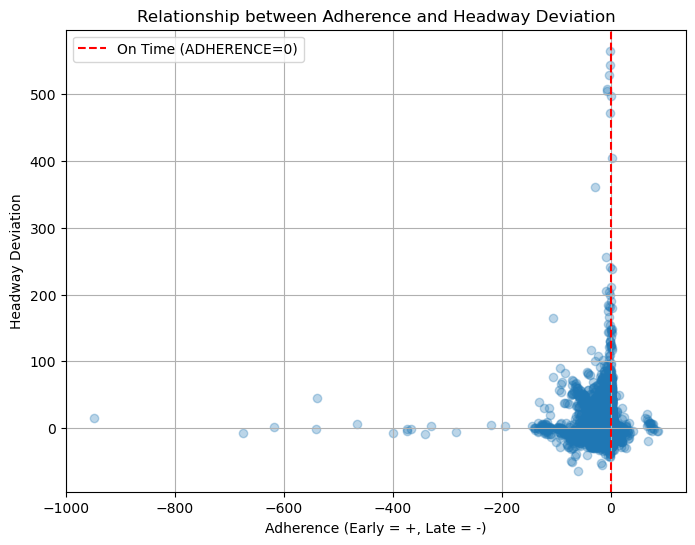

In [95]:
plt.figure(figsize=(8,6))
plt.scatter(new_df['ADHERENCE'], new_df['HDWY_DEV'], alpha=0.3)
plt.axvline(0, color='red', linestyle='--', label='On Time (ADHERENCE=0)')
plt.xlabel('Adherence (Early = +, Late = -)')
plt.ylabel('Headway Deviation')
plt.title('Relationship between Adherence and Headway Deviation')
plt.legend()
plt.grid(True)
plt.show()

In [97]:
correlation = new_df['ADHERENCE'].corr(new_df['HDWY_DEV'])
print("Correlation between Adherence and Headway Deviation:", correlation)

Correlation between Adherence and Headway Deviation: -0.20679390015312585


A negative value → late buses tend to increase headway deviation

HOUR

In [103]:
wego['DAY_OF_WEEK'] = pd.to_datetime(wego['DATE']).dt.day_name()
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ADH_CAT,DAY_OF_WEEK
0,120230801,1,99457890,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,6.500000,NaN,on time,Tuesday
1,120230801,1,99457891,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,on time,Tuesday
2,120230801,1,99457892,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,on time,Tuesday
3,120230801,1,99457893,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,NaN,0,0.000000,NaN,on time,Tuesday
4,120230801,1,99457894,8/1/2023,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,12.866666,5.0,on time,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,9/30/2023,7,702,2312,353448,0,TO DOWNTOWN,...,0,1,0,0,0.0,0,0.000000,NaN,late,Saturday
350325,120230930,2,100406611,9/30/2023,7,702,2312,353448,0,TO DOWNTOWN,...,0,1,0,0,NaN,0,0.000000,NaN,late,Saturday
350326,120230930,2,100406612,9/30/2023,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,on time,Saturday
350327,120230930,2,100406613,9/30/2023,7,702,2312,353449,0,FROM DOWNTOWN,...,0,1,0,0,0.0,0,0.000000,NaN,late,Saturday


DAY

In [105]:
daily_adherence = wego.groupby(['DAY_OF_WEEK', 'ADH_CAT']).size().unstack().fillna(0)
daily_adherence

ADH_CAT,early,late,on time
DAY_OF_WEEK,,,
Friday,1429,12389,44655
Monday,1532,6005,41579
Saturday,780,6747,29970
Sunday,809,3346,25673
Thursday,1433,10667,46356
Tuesday,1549,9587,47296
Wednesday,1501,10297,46729


In [108]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_adherence = daily_adherence.reindex(day_order)
daily_adherence

ADH_CAT,early,late,on time
DAY_OF_WEEK,,,
Monday,1532,6005,41579
Tuesday,1549,9587,47296
Wednesday,1501,10297,46729
Thursday,1433,10667,46356
Friday,1429,12389,44655
Saturday,780,6747,29970
Sunday,809,3346,25673


In [117]:

total_by_day = wego.groupby('DAY_OF_WEEK').size()


ontime_by_day = wego[wego['ADH_CAT'] == 'on time'].groupby('DAY_OF_WEEK').size()


ontime_percent_by_day = (ontime_by_day / total_by_day * 100).reindex(day_order)
wego


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ADH_CAT,DAY_OF_WEEK
0,120230801,1,99457890,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,6.500000,NaN,on time,Tuesday
1,120230801,1,99457891,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,on time,Tuesday
2,120230801,1,99457892,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,on time,Tuesday
3,120230801,1,99457893,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,NaN,0,0.000000,NaN,on time,Tuesday
4,120230801,1,99457894,8/1/2023,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,12.866666,5.0,on time,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,9/30/2023,7,702,2312,353448,0,TO DOWNTOWN,...,0,1,0,0,0.0,0,0.000000,NaN,late,Saturday
350325,120230930,2,100406611,9/30/2023,7,702,2312,353448,0,TO DOWNTOWN,...,0,1,0,0,NaN,0,0.000000,NaN,late,Saturday
350326,120230930,2,100406612,9/30/2023,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,on time,Saturday
350327,120230930,2,100406613,9/30/2023,7,702,2312,353449,0,FROM DOWNTOWN,...,0,1,0,0,0.0,0,0.000000,NaN,late,Saturday


C:\Users\user\AppData\Local\Temp\ipykernel_39608\2409670201.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


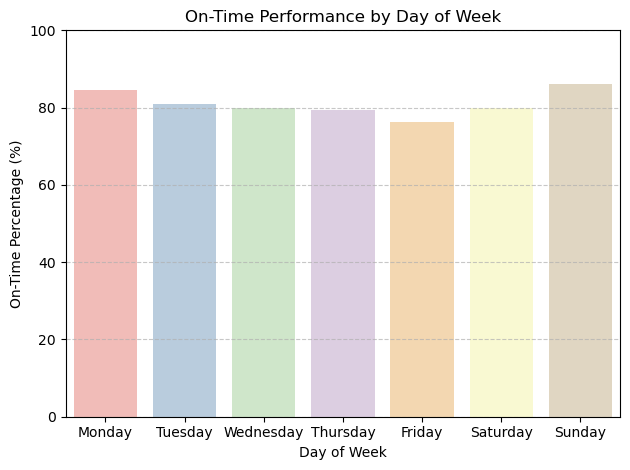

In [124]:
import seaborn as sns

sns.barplot(
    x=ontime_percent_by_day.index,
    y=ontime_percent_by_day.values,
    palette='Pastel1'
)
plt.title('On-Time Performance by Day of Week')
plt.ylabel('On-Time Percentage (%)')
plt.xlabel('Day of Week')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
